## Obtaining images from directory

data: https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification

In [258]:
from tensorflow import keras

In [259]:
# it's to normalize = rescale=1./255,
datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [260]:
data_dir = "dataset/"

**ImageDataGenerator.flow_from_directory**

Takes the path to a directory & generates batches of augmented data.

**tf.keras.preprocessing.image_dataset_from_directory**

Generates a tf.data.Dataset from image files in a directory.

If you're going to generate augmented images = flow_from_directory it's better. 
If you don't need augmented image, you can use image_dataset_from_directory.

In [261]:
train_data = datagen.flow_from_directory(
    directory=data_dir+'train', 
    shuffle=True, 
    target_size=(84, 84), 
    batch_size = 32,
    subset="training", 
    class_mode='categorical')

Found 4496 images belonging to 4 classes.


In [262]:
validation_data = datagen.flow_from_directory(
    directory=data_dir+'train', 
    shuffle=True, 
    target_size=(84, 84), 
    batch_size = 32,
    subset="validation", 
    class_mode='categorical')

Found 1123 images belonging to 4 classes.


In [263]:
train_data.num_classes

4

In [264]:
train_data.classes

array([0, 0, 0, ..., 3, 3, 3])

In [265]:
type(train_data.class_indices)

dict

In [266]:
train_data.class_indices.keys()

dict_keys(['cloudy', 'desert', 'green_area', 'water'])

## Visualizing image

In [267]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\annel\Anaconda3\envs\tf\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


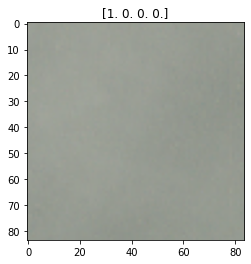

(84, 84, 3)


In [268]:
image, label = train_data.next()
plt.imshow(image[0])
plt.title(label[0])
plt.show()
print(image[0].shape)

In [269]:
def get_key(val, my_dict):
    for key, value in my_dict.items():
         if val == value:
             return key

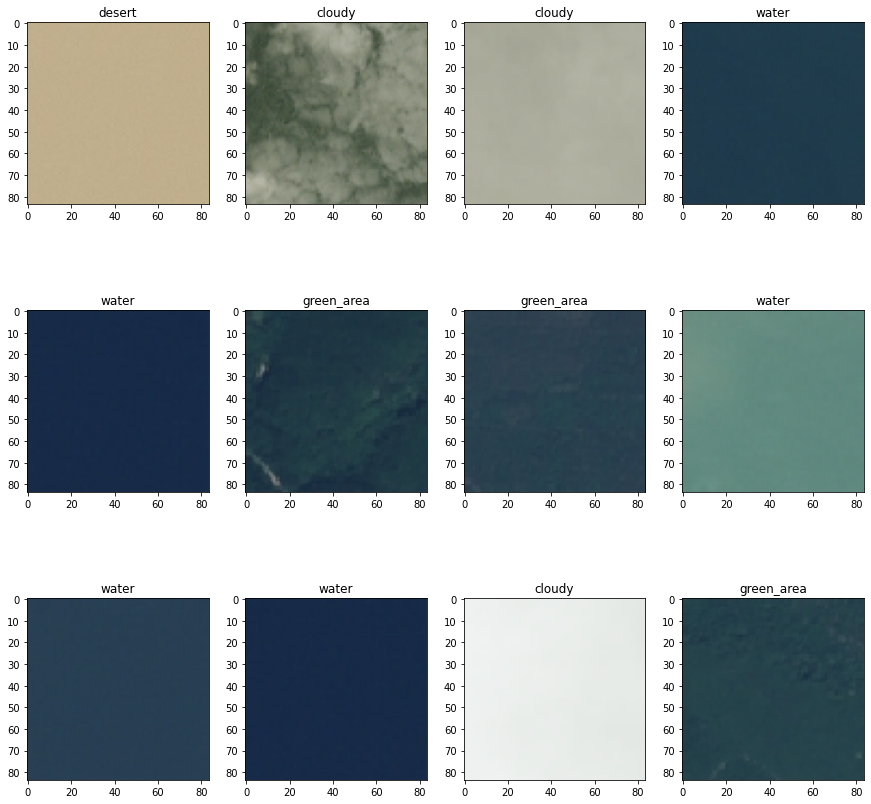

In [270]:
plt.figure(figsize=(15, 15))

for image, labels in next(zip(train_data)):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image[i])
        plt.title(get_key(np.argmax(labels[i]), train_data.class_indices))
        # plt.axis("off")
    plt.show()

## Statistical Analysis

In [271]:
from collections import Counter

dict_items([(0, 1196), (1, 900), (2, 1200), (3, 1200)])


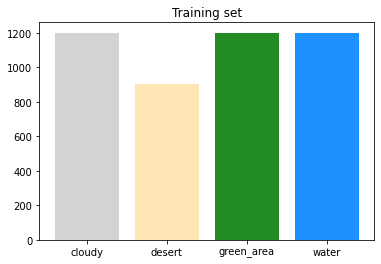

In [272]:
counter = Counter(train_data.classes)
print(counter.items())
x = []
y = []

for label, amount in list(counter.items()):
    x.append(get_key(label, train_data.class_indices))
    y.append(amount)
    
plt.title('Training set')
plt.bar(x, y, color=['lightgrey', 'moccasin', 'forestgreen', 'dodgerblue'])
plt.show()

dict_items([(0, 298), (1, 225), (2, 300), (3, 300)])


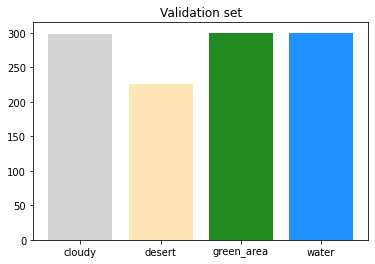

In [273]:
counter2 = Counter(validation_data.classes)
print(counter2.items())

x2 = []
y2 = []

for label, amount in list(counter2.items()):
    x2.append(get_key(label, validation_data.class_indices))
    y2.append(amount)
    
plt.title('Validation set')
plt.bar(x2, y2, color=['lightgrey', 'moccasin', 'forestgreen', 'dodgerblue'])
plt.show()

## Creating the model

In [274]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential

In [275]:
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(84, 84, 3), pooling='max', classes=4)

In [276]:
for layer in resnet.layers:
    layer.trainable = False

In [277]:
model = Sequential([
    resnet,
    Flatten(),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(4, activation='softmax')
])

In [278]:
model.summary() 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_13 (Dense)            (None, 100)               204900    
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 4)                 404       
                                                                 
Total params: 23,803,116
Trainable params: 215,404
Non-trainable params: 23,587,712
_________________________________________________________________


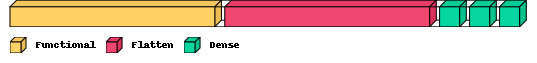

In [279]:
import visualkeras
visualkeras.layered_view(model, legend=True) 

In [280]:
early_stopping = EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

In [281]:
from tensorflow.keras.optimizers import Adam

In [282]:
model.compile(optimizer=Adam(), metrics=['accuracy'], loss='categorical_crossentropy')

In [283]:
from datetime import datetime
start = datetime.now()

history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1,
)

duration = datetime.now() - start
print("Training duration: ", duration)

Epoch 1/50
141/141 [==============================] - 140s 955ms/step - loss: 1.1192 - accuracy: 0.4333 - val_loss: 0.8671 - val_accuracy: 0.4844
Epoch 2/50
141/141 [==============================] - 131s 928ms/step - loss: 0.8077 - accuracy: 0.5256 - val_loss: 0.8146 - val_accuracy: 0.5619
Epoch 3/50
141/141 [==============================] - 134s 950ms/step - loss: 0.8020 - accuracy: 0.5518 - val_loss: 0.9716 - val_accuracy: 0.5004
Epoch 4/50
141/141 [==============================] - 131s 930ms/step - loss: 0.7671 - accuracy: 0.5638 - val_loss: 0.7613 - val_accuracy: 0.6483
Epoch 5/50
141/141 [==============================] - 134s 949ms/step - loss: 0.7457 - accuracy: 0.5605 - val_loss: 0.7672 - val_accuracy: 0.5165
Epoch 6/50
141/141 [==============================] - 134s 954ms/step - loss: 0.7283 - accuracy: 0.5830 - val_loss: 0.7379 - val_accuracy: 0.5735
Epoch 7/50
141/141 [==============================] - 132s 940ms/step - loss: 0.7224 - accuracy: 0.5939 - val_loss: 0.7685 -

## Plotting History

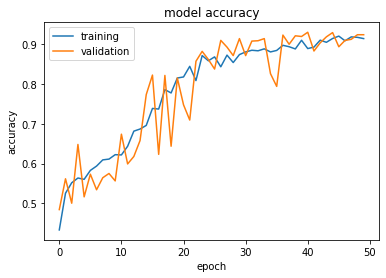

In [284]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

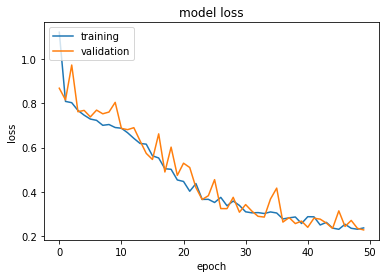

In [285]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

## Evaluate the model

In [286]:
score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

36/36 [==============================] - 25s 697ms/step - loss: 0.2290 - accuracy: 0.9243
Test loss: 0.22895988821983337
Test accuracy: 0.9243099093437195


## Prediction

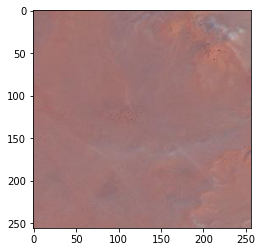

array([[1.0336865e-01, 8.9642596e-01, 4.4853982e-07, 2.0495494e-04]],
      dtype=float32)

In [287]:
import cv2
import numpy as np
image = cv2.imread('dataset/test/desert(1).jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image/255
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (84, 84))
image_resized = np.expand_dims(image_resized, axis = 0)
image_resized.shape
pred = model.predict(image_resized)
pred

In [288]:
output_class = get_key(np.argmax(pred), train_data.class_indices)
print("The predicted class is", output_class)

The predicted class is desert


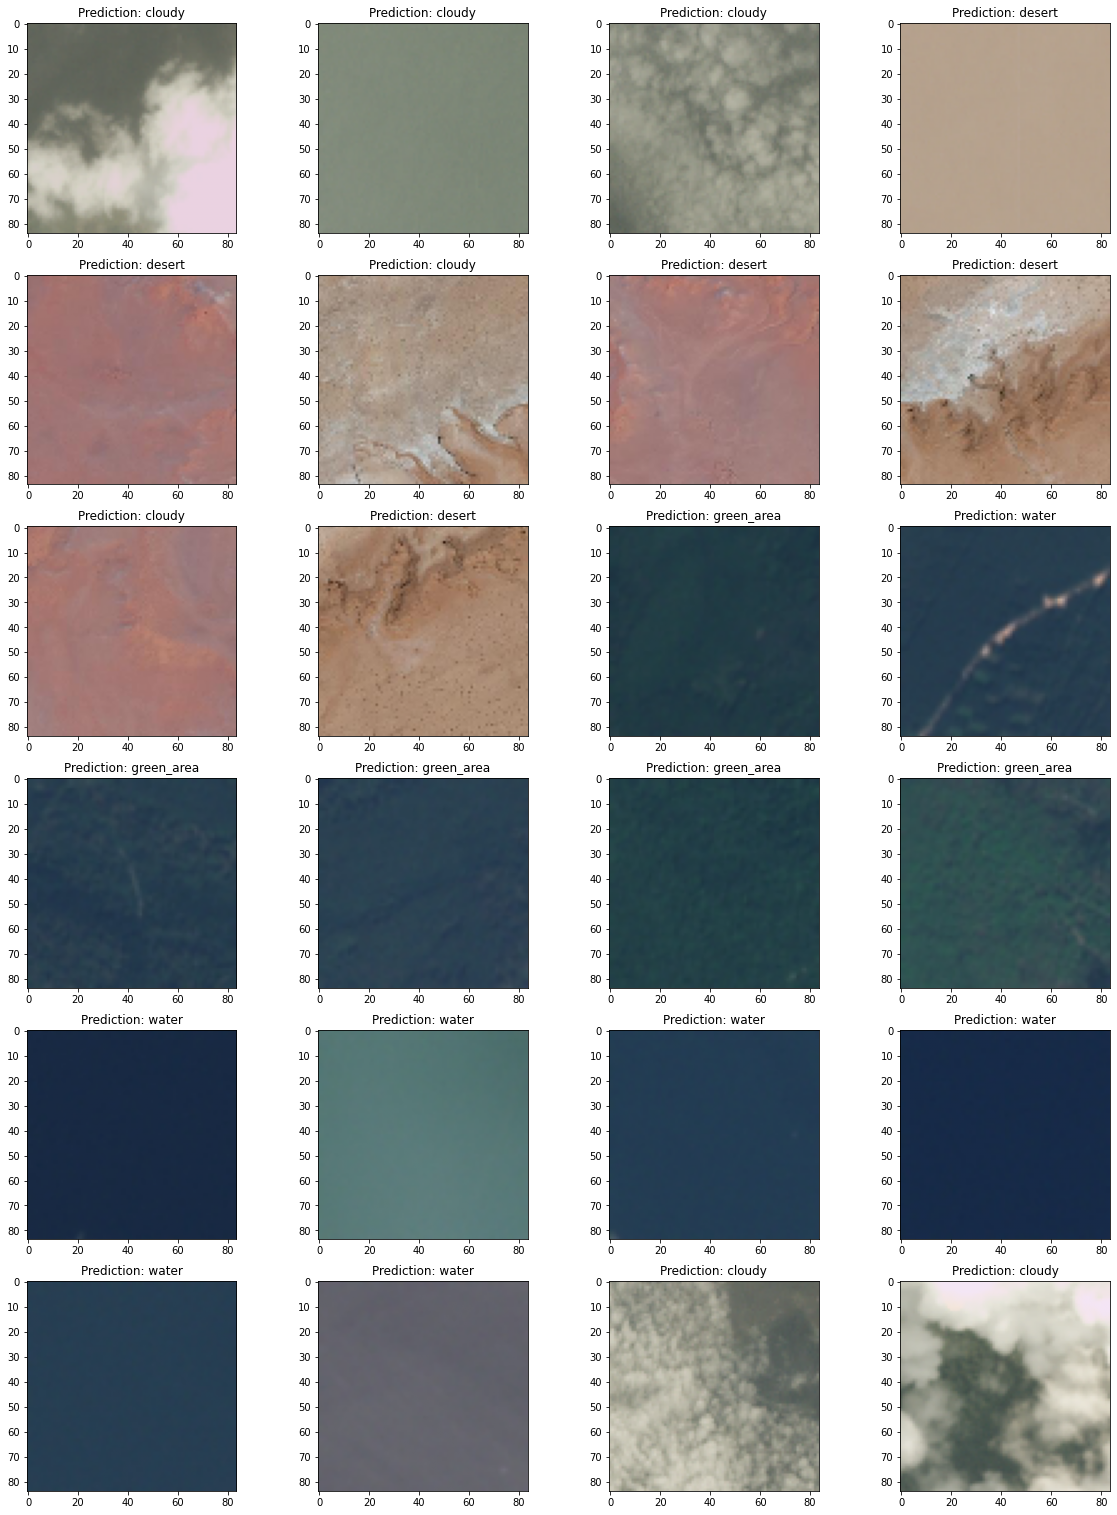

In [289]:
import os
i = 0
plt.figure(figsize=(20, 27))
for filename in os.listdir('dataset/test/'):
    img = cv2.imread(os.path.join('dataset/test/', filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (84, 84))
    img = img/255
    ax = plt.subplot(6, 4, i + 1)
    plt.imshow(img)
    img = np.expand_dims(img, axis = 0)
    pred = model.predict(img)
    output_class = get_key(np.argmax(pred), train_data.class_indices)
    plt.title("Prediction: " + output_class)
    i+=1
    
plt.show()